# Experiment: Using Pre-trained Models for Image Classification

This experiment demonstrates how to use pre-trained deep learning models to classify a given image dataset. The workflow includes data preprocessing, loading a pre-trained model, and use for image classification.

## Pre-trained Image Classification Models

Pre-trained models are deep learning architectures that have been previously trained on large benchmark datasets, such as ImageNet. These models can be used for feature extraction, transfer learning, or direct inference on new datasets. Below are some widely used pre-trained models for image classification:

### 1. VGG (Visual Geometry Group)
- **Variants:** VGG16, VGG19
- **Characteristics:** Deep architecture with 16 or 19 layers, uses small (3x3) convolution filters.
- **Pros:** Simple and effective, good for transfer learning.
- **Cons:** Large number of parameters, computationally expensive.

### 2. ResNet (Residual Networks)
- **Variants:** ResNet18, ResNet34, ResNet50, ResNet101, ResNet152
- **Characteristics:** Introduces residual connections (skip connections) to solve vanishing gradient problem.
- **Pros:** Very deep networks, efficient training, high accuracy.
- **Cons:** More complex architecture.

### 3. DenseNet (Densely Connected Convolutional Networks)
- **Variants:** DenseNet121, DenseNet169, DenseNet201, DenseNet161
- **Characteristics:** Each layer receives input from all previous layers, promoting feature reuse.
- **Pros:** Fewer parameters, improved flow of information and gradients.
- **Cons:** More memory usage due to dense connections.

### 4. Inception (GoogLeNet)
- **Variants:** Inception v3, Inception v4
- **Characteristics:** Uses parallel convolutional layers with different filter sizes, auxiliary classifiers.
- **Pros:** Efficient, good accuracy, multi-scale feature extraction.
- **Cons:** Complex architecture.

### 5. MobileNet
- **Variants:** MobileNetV2, MobileNetV3
- **Characteristics:** Designed for mobile and embedded vision applications, uses depthwise separable convolutions.
- **Pros:** Lightweight, fast inference, suitable for edge devices.
- **Cons:** Slightly lower accuracy compared to larger models.

### 6. EfficientNet
- **Variants:** EfficientNet-B0 to EfficientNet-B7
- **Characteristics:** Scales depth, width, and resolution systematically for better performance.
- **Pros:** State-of-the-art accuracy with fewer parameters and FLOPS.
- **Cons:** Requires careful scaling for optimal performance.

### 7. AlexNet
- **Characteristics:** One of the earliest deep CNNs, 8 layers, ReLU activations.
- **Pros:** Historical significance, simple architecture.
- **Cons:** Outperformed by newer models.

### 8. SqueezeNet
- **Characteristics:** Very small model size, uses "fire modules" for parameter reduction.
- **Pros:** Lightweight, suitable for deployment on devices with limited resources.
- **Cons:** Lower accuracy than larger models.

---

Most of these models are available in popular deep learning libraries such as PyTorch (`torchvision.models`) and TensorFlow (`tf.keras.applications`). They can be easily loaded and fine-tuned for custom image classification tasks.

## FAQ: Pre-trained Image Classification Models

**Q1: What is a pre-trained model?**  
A pre-trained model is a neural network that has already been trained on a large benchmark dataset (such as ImageNet) and can be reused for similar tasks, saving time and computational resources.

**Q2: Why use pre-trained models for image classification?**  
Pre-trained models provide strong feature extraction capabilities and can achieve high accuracy with less data and training time, especially when data is limited.

**Q3: Can I fine-tune a pre-trained model on my own dataset?**  
Yes. Fine-tuning involves training some or all layers of a pre-trained model on your dataset to adapt it to your specific task.

**Q4: Which libraries provide pre-trained models?**  
Popular libraries include PyTorch (`torchvision.models`), TensorFlow (`tf.keras.applications`), and Keras.

**Q5: How do I choose the right pre-trained model?**  
Consider factors such as accuracy, model size, inference speed, and hardware constraints. For mobile or edge devices, lightweight models like MobileNet or SqueezeNet are preferred.

**Q6: Are pre-trained models suitable for all image classification tasks?**  
Pre-trained models work well for tasks similar to their original training data. For very different domains, additional fine-tuning or custom models may be necessary.

**Q7: What are the limitations of pre-trained models?**  
They may not generalize well to domains very different from their training data, and large models can be resource-intensive.

**Q8: Do I need to preprocess my images before using a pre-trained model?**  
Yes. Images should be resized and normalized according to the requirements of the specific model (e.g., 224x224 pixels, specific mean and std values).

**Q9: Can pre-trained models be used for feature extraction only?**  
Yes. You can use the output of intermediate layers as feature vectors for other machine learning tasks.

**Q10: Is transfer learning the same as using a pre-trained model?**  
Transfer learning typically involves using a pre-trained model and adapting it (fine-tuning) for a new, related task.



### What Are Pre-trained Models Trained On?

Pre-trained image classification models are typically trained on large, diverse datasets to learn general visual features. The most common benchmark dataset is **ImageNet**, which contains over 1.2 million labeled images spanning 1,000 object categories, including animals, vehicles, everyday objects, and more.

#### Key Points:
- **ImageNet**: The primary dataset for most pre-trained models. It covers a wide variety of classes and provides rich, generalizable features.
- **Other Datasets**: Some models may be trained on datasets like CIFAR-10, CIFAR-100, COCO, or Places365, but ImageNet is the standard for deep learning architectures.
- **Purpose**: Training on such large datasets enables models to recognize patterns, textures, shapes, and colors that are useful for many computer vision tasks.

#### Why Is This Important?
- **Transfer Learning**: Because these models have learned generic features from millions of images, they can be adapted (fine-tuned) to new tasks with smaller datasets.
- **Feature Extraction**: The learned representations are useful for extracting features for other machine learning tasks.

---

**Summary:**  
Most pre-trained models available in libraries like PyTorch and TensorFlow are trained on ImageNet, making them highly effective for transfer learning and feature extraction in a wide range of image classification problems.

In [13]:
from PIL import Image
import requests
from torchvision import models
import torch

# Download a random image from the internet
img_url = "https://images.unsplash.com/photo-1519125323398-675f0ddb6308"
img_path = "random_image.jpg"
with open(img_path, 'wb') as f:
    f.write(requests.get(img_url).content)

# Load and preprocess the image
image = Image.open(img_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)  # Use the existing 'transform'

# Load a pre-trained model (e.g., ResNet50)
model = models.resnet50(pretrained=True)
model.eval()

# Predict
with torch.no_grad():
    output = model(input_tensor)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

# Get top 5 predictions
labels_path = "imagenet_classes.txt"
if not os.path.exists(labels_path):
    # Download ImageNet class labels
    labels_url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
    with open(labels_path, 'w') as f:
        f.write(requests.get(labels_url).text)
with open(labels_path) as f:
    labels = [line.strip() for line in f.readlines()]

top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(labels[top5_catid[i]], top5_prob[i].item())

/Users/pruthvirajv/Library/CloudStorage/OneDrive-ArivuAIInnovationsPrivateLimited(2)/Oil & Gas/GSSS-DeepLearning-Course/module1_dl_env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/pruthvirajv/Library/CloudStorage/OneDrive-ArivuAIInnovationsPrivateLimited(2)/Oil & Gas/GSSS-DeepLearning-Course/module1_dl_env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/pruthvirajv/.cache/torch/hub/checkpoints/resne

cliff 0.24023978412151337
promontory 0.06938047707080841
switch 0.05989161506295204
lakeside 0.04753335565328598
hook 0.04048272594809532


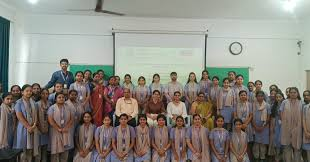

Top 5 predictions for GSSSStudentsClassPhoto.jpeg:


,Category,Probability
0,theater curtain,0.210910
1,stage,0.172470
2,bow,0.069324
3,vestment,0.067734
4,shoe shop,0.045830


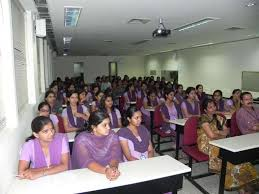

Top 5 predictions for GSSSStudents.jpeg:


,Category,Probability
0,projector,0.509642
1,restaurant,0.085943
2,screen,0.050824
3,library,0.042107
4,monitor,0.039408


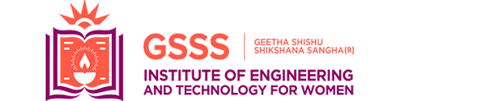

Top 5 predictions for GSSS.png:


,Category,Probability
0,web site,0.346303
1,envelope,0.068342
2,menu,0.040566
3,Band Aid,0.032255
4,hair slide,0.025869


In [17]:
import pandas as pd
from IPython.display import display

for filename in os.listdir(image_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path).convert('RGB')
        display(img)
        input_tensor = transform(img).unsqueeze(0)
        with torch.no_grad():
            output = model(input_tensor)
            probabilities = torch.nn.functional.softmax(output[0], dim=0)
        top5_prob, top5_catid = torch.topk(probabilities, 5)
        df = pd.DataFrame({
            'Category': [labels[i] for i in top5_catid],
            'Probability': [float(p) for p in top5_prob]
        })
        print(f"Top 5 predictions for {filename}:")
        display(df)
